In [1]:
!pip install -U vnstock

In [2]:
from vnstock import *

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [4]:
# Lấy dữ liệu lịch sử cổ phiếu
df = stock_historical_data(symbol="MSN", start_date="2013-12-31", end_date="2024-01-01", resolution="1D", type="stock", beautify=True, decor=False, source='DNSE')
df

,time,open,high,low,close,volume,ticker
0,2014-01-02,42820,42820,42050,42310,92560,MSN
1,2014-01-03,42310,42570,42050,42050,48500,MSN
2,2014-01-06,42310,42570,42050,42310,119510,MSN
3,2014-01-07,42310,43080,42310,42570,121200,MSN
4,2014-01-08,43080,43600,42570,43600,153340,MSN
...,...,...,...,...,...,...,...
2490,2023-12-25,63200,66500,63200,66400,3234900,MSN
2491,2023-12-26,66900,66900,65600,66200,2681200,MSN
2492,2023-12-27,66200,67900,66000,67000,2866200,MSN
2493,2023-12-28,67100,67600,66600,67000,1859800,MSN


In [5]:
df.head()

,time,open,high,low,close,volume,ticker
0,2014-01-02,42820,42820,42050,42310,92560,MSN
1,2014-01-03,42310,42570,42050,42050,48500,MSN
2,2014-01-06,42310,42570,42050,42310,119510,MSN
3,2014-01-07,42310,43080,42310,42570,121200,MSN
4,2014-01-08,43080,43600,42570,43600,153340,MSN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    2495 non-null   object
 1   open    2495 non-null   int64 
 2   high    2495 non-null   int64 
 3   low     2495 non-null   int64 
 4   close   2495 non-null   int64 
 5   volume  2495 non-null   int64 
 6   ticker  2495 non-null   object
dtypes: int64(5), object(2)
memory usage: 136.6+ KB


In [7]:
df.describe()

,open,high,low,close,volume
count,2495.000000,2495.000000,2495.000000,2495.000000,2.495000e+03
mean,63251.106212,64188.313427,62334.172345,63275.882966,8.948320e+05
std,26271.806388,26805.072429,25768.676864,26259.462508,9.532428e+05
min,30440.000000,30950.000000,30180.000000,30690.000000,1.450000e+03
25%,41530.000000,42050.000000,41020.000000,41530.000000,2.920950e+05
50%,60650.000000,61390.000000,60010.000000,60650.000000,6.077700e+05
75%,76500.000000,77440.000000,75320.000000,76300.000000,1.170670e+06
max,142280.000000,144760.000000,140220.000000,142280.000000,9.870200e+06


In [8]:
# chia data ra thành 2 phần: x là input, y là output
x = df[['open','high','low','volume']].values
y = df['close'].values

In [9]:
x

array([[  42820,   42820,   42050,   92560],
       [  42310,   42570,   42050,   48500],
       [  42310,   42570,   42050,  119510],
       ...,
       [  66200,   67900,   66000, 2866200],
       [  67100,   67600,   66600, 1859800],
       [  67100,   68300,   67000, 2217700]])

In [10]:
y

array([42310, 42050, 42310, ..., 67000, 67000, 67000])

In [11]:
# Chia data thành 2 phần: 1 phần để train data, 1 phần để test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [12]:
# Linear Regression Model
regressor = LinearRegression()

In [13]:
regressor.fit(x_train, y_train)

LinearRegression()

In [15]:
regressor.coef_

array([-5.00333203e-01,  7.99177220e-01,  6.96105872e-01,  8.20015990e-05])

In [16]:
regressor.intercept_

160.34213103100046

In [17]:
prediction = regressor.predict(x_test)

In [18]:
prediction

array([ 61896.98707118,  37642.55927721,  50340.6079453 , 142388.50377669,
        43977.29763236,  37050.96516404,  71003.11053564,  42448.26397941,
        72497.99836734,  37280.73182214, 125752.72602636,  75473.74601885,
       114954.54884021,  81928.07372903,  44612.77300239,  64850.51141097,
       131170.82376174,  36035.13447362,  38832.27446125,  81074.84458723,
        47135.60176972,  44208.26141723,  71868.26995905,  37616.1341985 ,
        44214.30252188,  64272.99040218,  61300.18946013,  63958.87305459,
        67992.73668047,  55924.02618725, 124282.02357391,  39362.11969148,
        31717.38987948,  68624.46964322,  36262.66991425,  43059.96547242,
        67380.89624067, 116425.27967506,  94777.56311354,  36787.63527594,
        43095.91561796,  46317.9329825 ,  73753.05956012,  36678.32773717,
        37033.57171223,  37807.94600214,  33018.49466728, 117863.80904146,
        50726.11340178,  70937.01990021,  68666.37637161,  63056.87146948,
        60895.94787161,  

In [19]:
data = pd.DataFrame({'Thực tế': y_test.flatten(), 'Dự đoán': prediction.flatten()})

In [20]:
data.head()

,Thực tế,Dự đoán
0,62110,61896.987071
1,37660,37642.559277
2,50040,50340.607945
3,142280,142388.503777
4,43650,43977.297632


In [21]:
data.head(30)

,Thực tế,Dự đoán
0,62110,61896.987071
1,37660,37642.559277
2,50040,50340.607945
3,142280,142388.503777
4,43650,43977.297632
5,36890,37050.965164
6,71020,71003.110536
7,43080,42448.263979
8,72450,72497.998367
9,37150,37280.731822


In [23]:
# Tính mse và rmse
import math
print('Mean Squared Error:', metrics.mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Squared Error: 594706.2523297071
Root Mean Squared Error: 771.1719991867619


<Axes: >

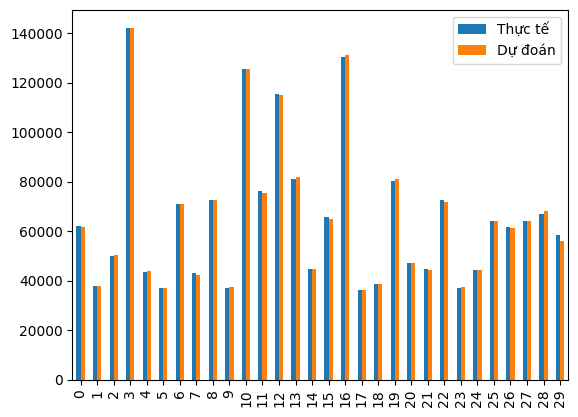

In [27]:
graph = data.head(30)
graph.plot(kind='bar')